# 1.4.4 Smoothing Images
### cv2.filter2D()

In [1]:
# 2D Convolution ( Image Filtering )

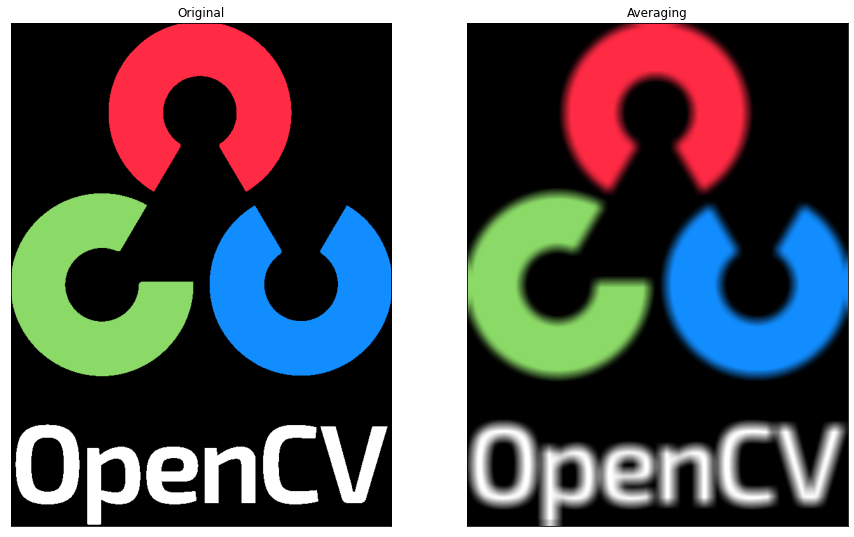

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 필터링
# 이미지 후처리를 의미함
# 이미지를 부드럽게 하는 것이 목적이다.

# 이미지를 읽어 BGR을 RGB로 변경해준다.
img = cv2.imread('logo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Kernel의 행렬을 n*n으로 잡는다.
# Kernel의 행렬은 모든 값이 1로 되어있는 numpy행렬이다.
# n이 짝수이면 가운데 남은 2*2의 행렬의 평균값을 구한다.
n = 19
kernel = np.ones((n, n), np.float32) / (n * n)

# Kernel 내에 있는 픽셀값의 합을 구한다.
# cv2.filter2D(이미지, 출력 영상 데이터 타입, 커널크기(필터마스크))
# 데이터 타입에서 -1은 입력 영상과 동일한 데이터의 출력 영상을 생성하는 것
dst = cv2.filter2D(img, -1, kernel)

plt.rcParams["figure.figsize"] = (15, 10)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])

plt.show()

In [3]:
# numpy 배열로 5*5를 생성하고 데이터타입은 float32를 사용한다.
np.ones((5,5), np.float32)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [4]:
# n * n의 결과를 확인하기 위해서는 두 번의 sum()함수를 사용해야한다.
# 다만 비트연산의 한계로 인하여 정확하게 1로 나오지는 않는다.
sum(sum(kernel))

0.9999997243285179

##### Image Blurring (Image Smoothing)

In [5]:
# 1. Averaging

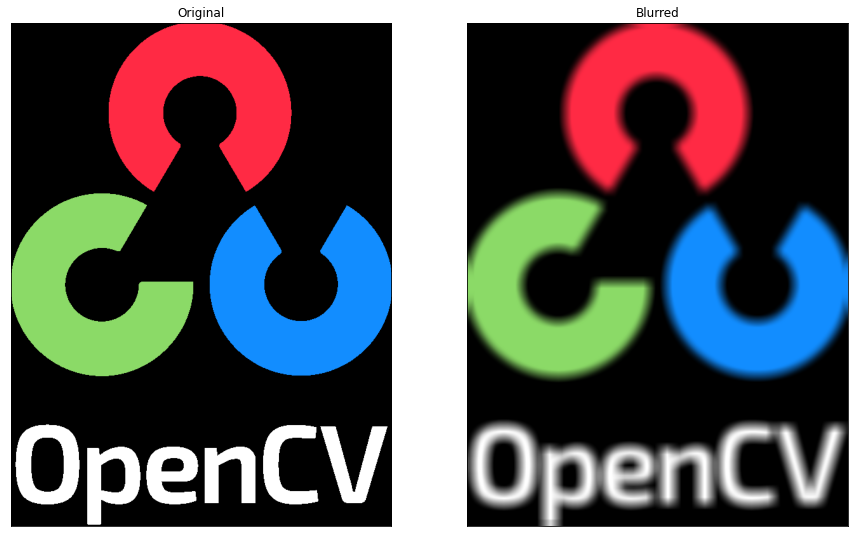

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 평균값으로 필터링

# 이미지를 읽어 BGR을 RGB로 변경해준다.
img = cv2.imread('logo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# n = 20
# kernel = np.ones((n,n),np.float32)/(n*n)
# dst = cv2.filter2D(img,-1,kernel)
# 위의 작업이 cv2.blur()라고 보면 된다.

# Kernel의 행렬을 n*n으로 지정
n = 20

# cv2.blur(이미지, 커널크기(행렬))
blur = cv2.blur(img, (n, n))

plt.rcParams["figure.figsize"] = (15, 10)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])

plt.show()

In [7]:
# 2. Gaussian Filtering

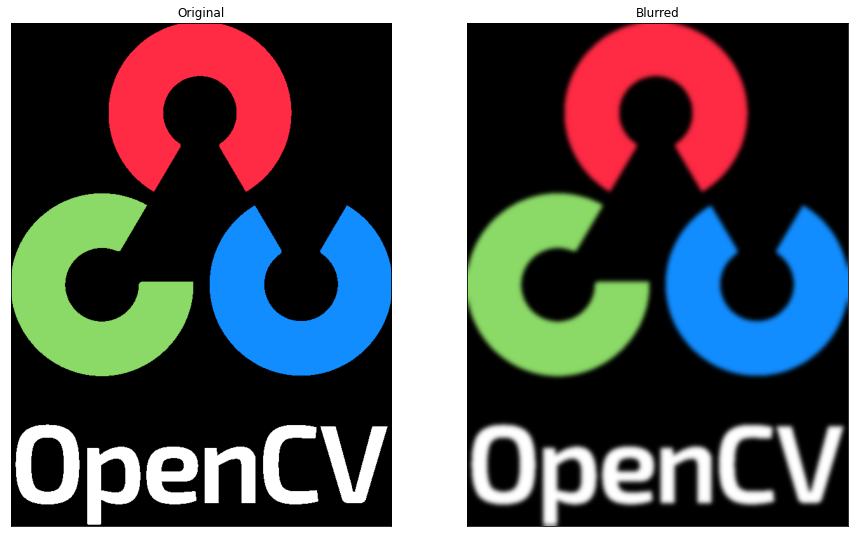

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 가우시안 블러
# 통계학(노멀 분포(normal distribution))
# 중앙에 있는 값을 높게 잡고 바깥은 낮게 잡는 형태의 행렬

# 이미지를 읽어 BGR을 RGB로 변경해준다.
img = cv2.imread('logo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 가우시안 블러 --> n이 홀수만 가능하다
n = 21

# ROI 주변으로 지정한 커널 크기(ksize) 내의 픽셀 중 중심에 있는 픽셀에 높은 가중치를 부여하는 방식
# cv2.GaussianBlur(src, ksize, sigmaX)
# src: 입력 영상. 각 채널 별로 처리됨.
# ksize: 가우시안 커널 크기. (0, 0)을 지정하면 sigma 값에 의해 자동 결정됨
# sigmaX: x방향 sigma.

gaussian = cv2.GaussianBlur(img, (n, n), 0)

plt.rcParams["figure.figsize"] = (15, 10)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(gaussian),plt.title('Blurred')
plt.xticks([]), plt.yticks([])

plt.show()

In [9]:
# 3. Median Filtering

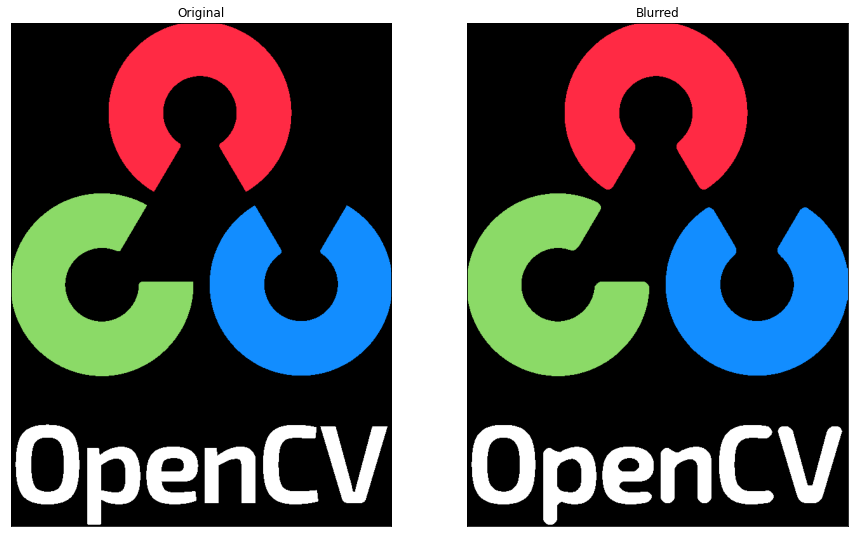

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 중앙값을 사용함
# 평균과는 다른 모든 값을 정렬했을 때의 가장 중간에 있는 값 사용
# 이미지의 노이즈를 효과적으로 제거할 수 있다.

# 이미지를 읽어 BGR을 RGB로 변경해준다.
img = cv2.imread('logo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 메디안 블러 --> n이 홀수만 가능하다
n = 15

# cv2.medianBlur(이미지, value)
# 지정한 커널 크기(value x value) 내의 픽셀을 크기순으로 정렬한 후 중간값을 뽑아서(평균이 아님에 주의) 픽셀값으로 사용하는 기법
median = cv2.medianBlur(img, n)

plt.rcParams["figure.figsize"] = (15, 10)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])

plt.show()

In [11]:
# 4. Bilateral Filtering

엣지가 살아나도록 smoothing
20세기말에 만들어짐

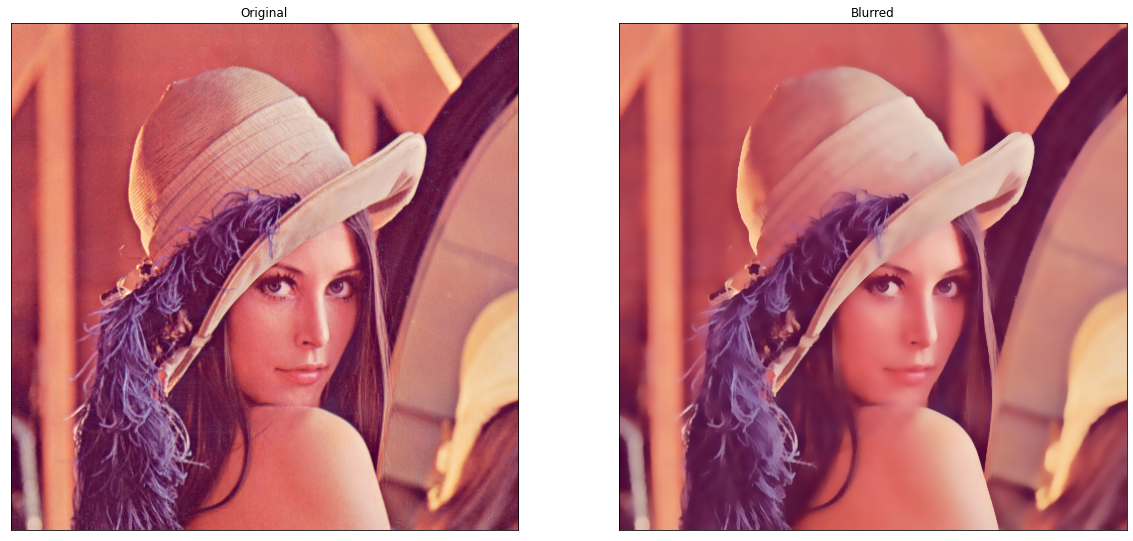

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 경계선(엣지)이 살아나도록 Smoothing하는 기법, 20세기 말에 만들어졌음
# 지금까지의 Blur처리는 경계선까지 Blur처리가 되어, 경계선이 흐려지게 된다.
# Bilateral Filtering(양방향 필터)은 경계선을 유지하면서 Gaussian Blur처리를 해주는 방법이다.

# 이미지를 읽어 BGR을 RGB로 변경해준다.
img = cv2.imread('lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# cv2.bilateralFilter(이미지, value, sigmaColor, sigmaSpace)
# value – filtering시 고려할 주변 pixel 지름(value * value가 된다.)
# sigmaColor – Color를 고려할 공간. 숫자가 크면 멀리 있는 색도 고려함.
# sigmaSpace – 숫자가 크면 멀리 있는 pixel도 고려함.
n = 10
bilateral = cv2.bilateralFilter(img, n, 75, 75)

plt.rcParams["figure.figsize"] = (20, 10)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(bilateral),plt.title('Blurred')
plt.xticks([]), plt.yticks([])

plt.show()

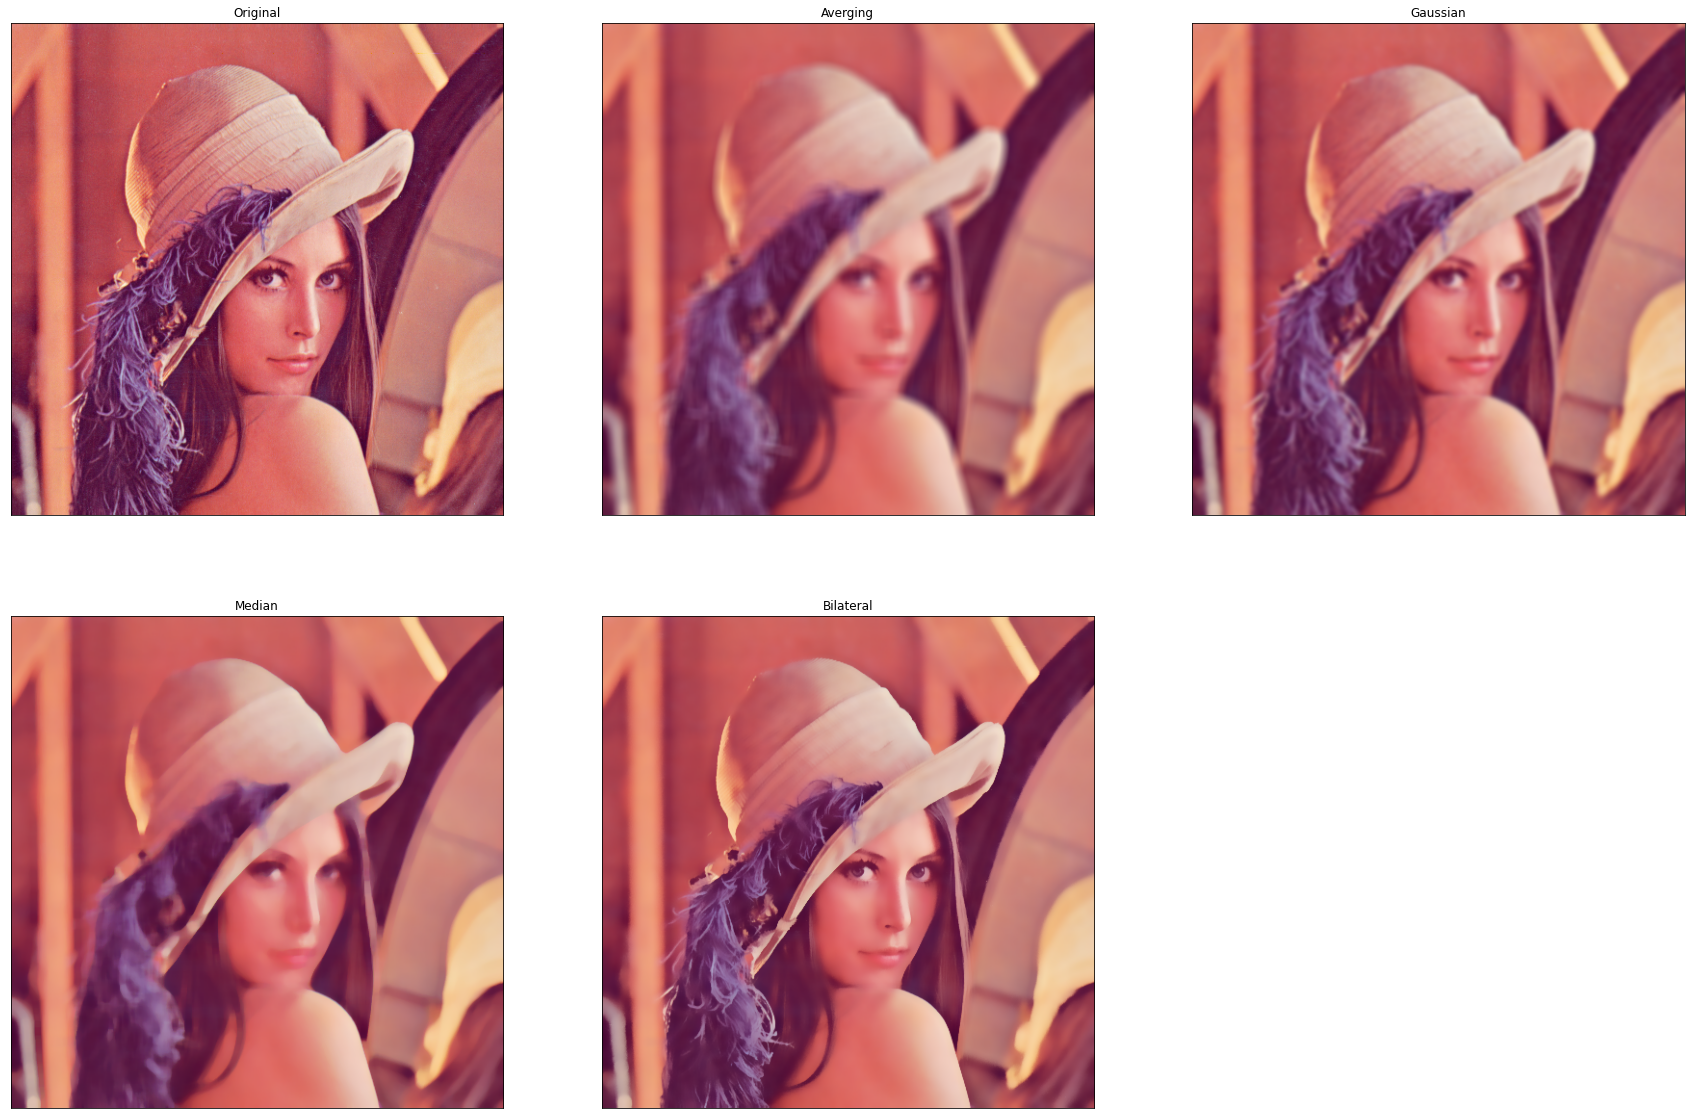

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

n = 11

blur = cv2.blur(img, (n, n))
gaussian = cv2.GaussianBlur(img, (n, n), 0)
median = cv2.medianBlur(img, n)
bilateral = cv2.bilateralFilter(img, n, 75, 75)

plt.rcParams["figure.figsize"] = (30, 20)

plt.subplot(231),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(blur),plt.title('Averging')
plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(gaussian),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(bilateral),plt.title('Bilateral')
plt.xticks([]), plt.yticks([])

plt.show()